In [1]:
import datetime
begin_time = datetime.datetime.now()
import numpy as np
import pandas as pd
dtypes = {'some_categorical_column': 'category'} 
# Crime_Data_from_2010_to_2019.csv 
# Crime_Data_con.csv
data = pd.read_csv("D:\\UCSD course\ECE 143 -  Programming for Data Analysis\\project\\Crime_Data_from_2010_to_2019.csv", dtype=dtypes)
yrmth=[]
for time in data['DATE OCC']:
    time=pd.to_datetime(time)
    yrmth.append(time.year*100+time.month)
data['yrmth']=yrmth
# print(data.groupby('yrmth')['Crm Cd'].count().to_frame())
print("total time",datetime.datetime.now() - begin_time)

total time 0:04:32.502364


In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 32, 8
import matplotlib.pyplot as plt
def crmcnt(data,til=""):
    z=data.groupby('yrmth')['Crm Cd'].count().to_frame().sort_index()
    ym=list(z.index)
    cd=list(z['Crm Cd'])
    """
    for i in range(len(z)):
        # print(y[i],cd[i])
        break
    """
    ymstr=[]
    for i in range(len(ym)):
        ymstr.append(str(ym[i]))
    # plt.plot(ymstr,cd)#,scalex=True) # list(range(len(cd)))
    x=list(range(len(cd)))
    plt.plot(x,cd)#,scalex=True) # 
    plt.xticks(x, ymstr, rotation ='vertical')
    plt.title(til)
    plt.show()

crmcod={}
crmcod['HOMICIDE']=[110,113]
crmcod['RAPE']=[121,122,815,820,821]
crmcod['ROBBERY']=[210,220]
crmcod['AGG.ASSAULTS']=[230,231,235,236,250,251,761,926]
crmcod['SIMPLE ASSAULT']=[435,436,437,622,623,624,625,626,627,647,763,928,930]
crmcod['BURGLARY']=[310,320]
crmcod['MVT']=[510,520,433]
crmcod['BTFV']=[330,331,410,420,421]
crmcod['PERSONAL THFT']=[350,351,352,353,450,451,452,453]
crmcod['OTHER THEFT']=[341,343,345,440,441,442,443,444,445,470,471,472,473,474,475,480,485,487,491]

In [25]:
%time
"""
for key in crmcod.keys():
    for num in crmcod[key]:
        crmcnt(data[data['Crm Cd']==num],key+" "+str(num))
    # crmcnt(data[data['Crm Cd'].isin(crmcod[key])],key)
crmcnt(data,'total')
"""

Wall time: 0 ns


'\nfor key in crmcod.keys():\n    for num in crmcod[key]:\n        crmcnt(data[data[\'Crm Cd\']==num],key+" "+str(num))\n    # crmcnt(data[data[\'Crm Cd\'].isin(crmcod[key])],key)\ncrmcnt(data,\'total\')\n'

201001 202112


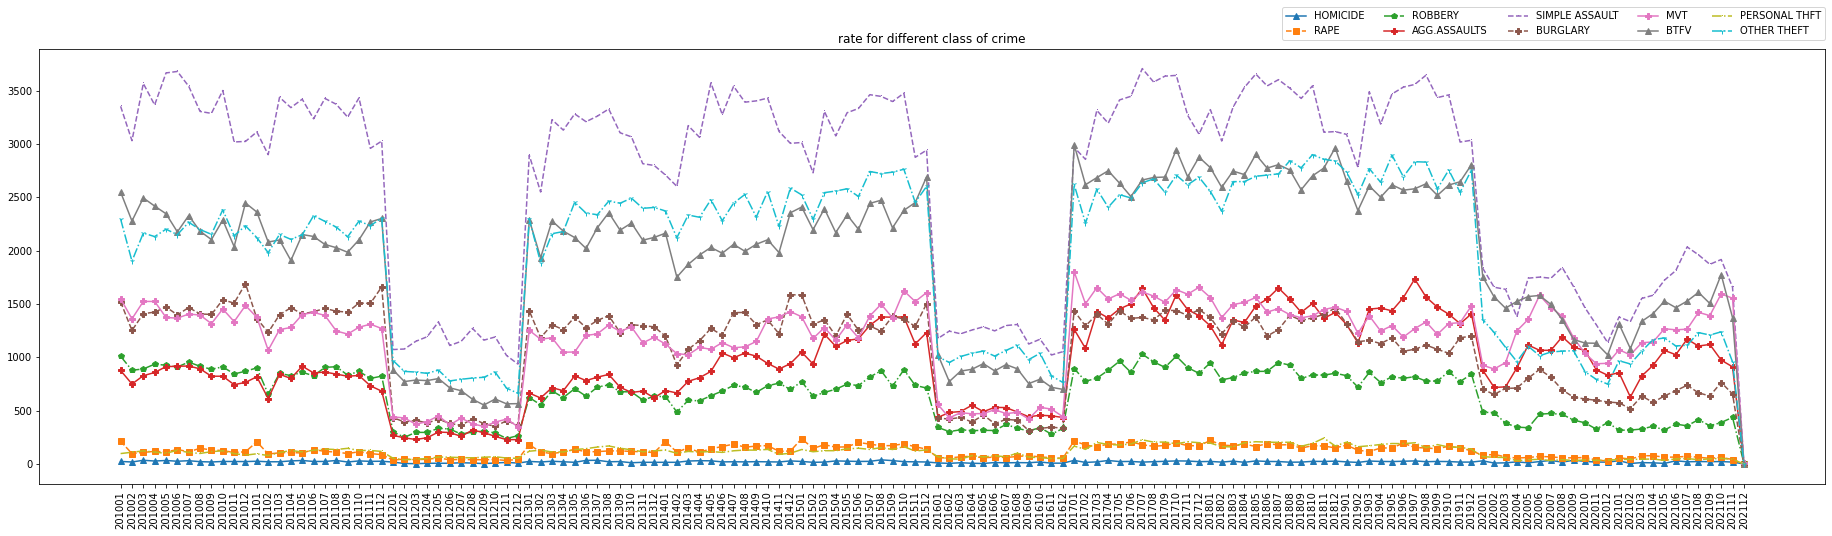

In [26]:
# xticks
def st_ed_yrmth(data):
    st_yrmth=min(data['yrmth'])
    ed_yrmth=max(data['yrmth'])
    print(st_yrmth,ed_yrmth)
    s_yr=st_yrmth // 100
    s_mth=st_yrmth % 100
    res=[]
    while s_yr*100+s_mth <= ed_yrmth:
        res.append(s_yr*100+s_mth)
        if s_mth==12:
            s_mth = 1
            s_yr += 1
        else:
            s_mth += 1
    return res

import random
def crmcnt_multi(data,ymnum,name=[],til=""):
    x=list(range(len(ymnum)))
    ymstr=[]
    for i in range(len(ymnum)):
        ymstr.append(ymnum[i])
    
    fig, ax = plt.subplots()
    lnstl=['-','--','-.'] #,':'
    ptstl=['o','d','v','s','.',',','^','1','p','P']
    
    for i in range(len(data)):
        z=data[i].groupby('yrmth_cls')['Crm Cd'].count().to_frame().sort_index()
        cd=list(z['Crm Cd']) # y
        # ax.plot(x,cd,label=name[i],linestyle='--')
        lnstl_x=lnstl[random.randrange(len(lnstl))]
        ptstl_x=ptstl[random.randrange(len(ptstl))]
        ax.plot(x,cd,ptstl_x,label=name[i],linestyle=lnstl_x)
    ax.legend(bbox_to_anchor=(0., 1.02 , 1., .102), loc='lower right',
                      ncol=5, borderaxespad=0.)
    plt.xticks(x, ymstr, rotation ='vertical')
    plt.title(til)


select=[]
name=[]
ymnum=st_ed_yrmth(data)
cate=pd.CategoricalDtype(ymnum,ordered=True)
data['yrmth_cls']=data['yrmth'].astype(cate)
for key in crmcod.keys():
    select.append(data[data['Crm Cd'].isin(crmcod[key])])
    name.append(key)
crmcnt_multi(select,ymnum,name,til='rate for different class of crime')

Wall time: 0 ns
201001 202112


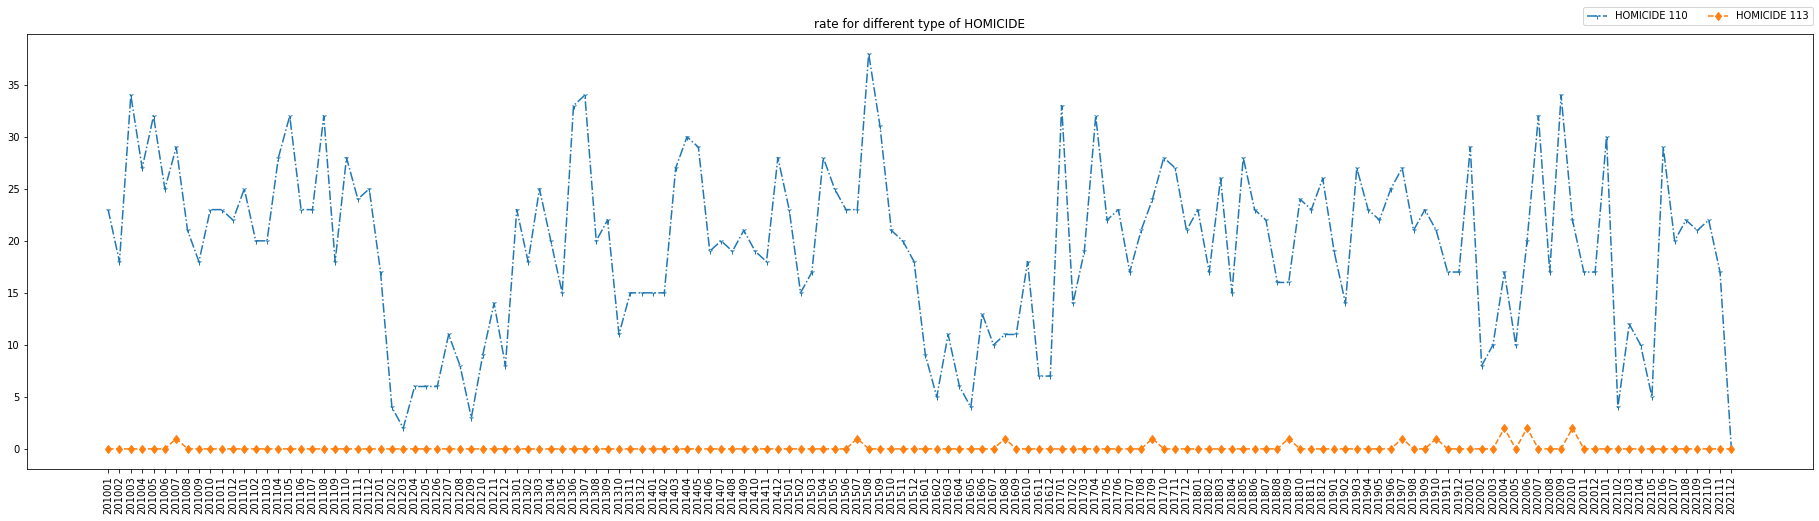

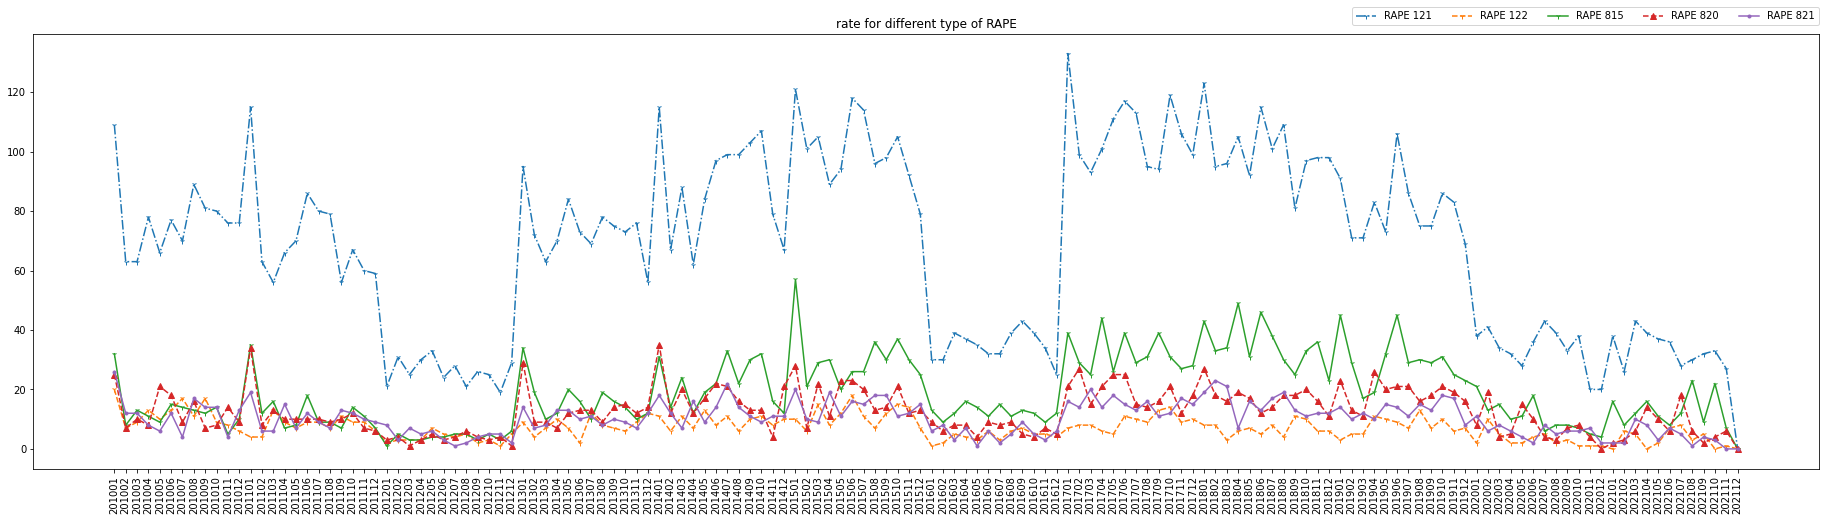

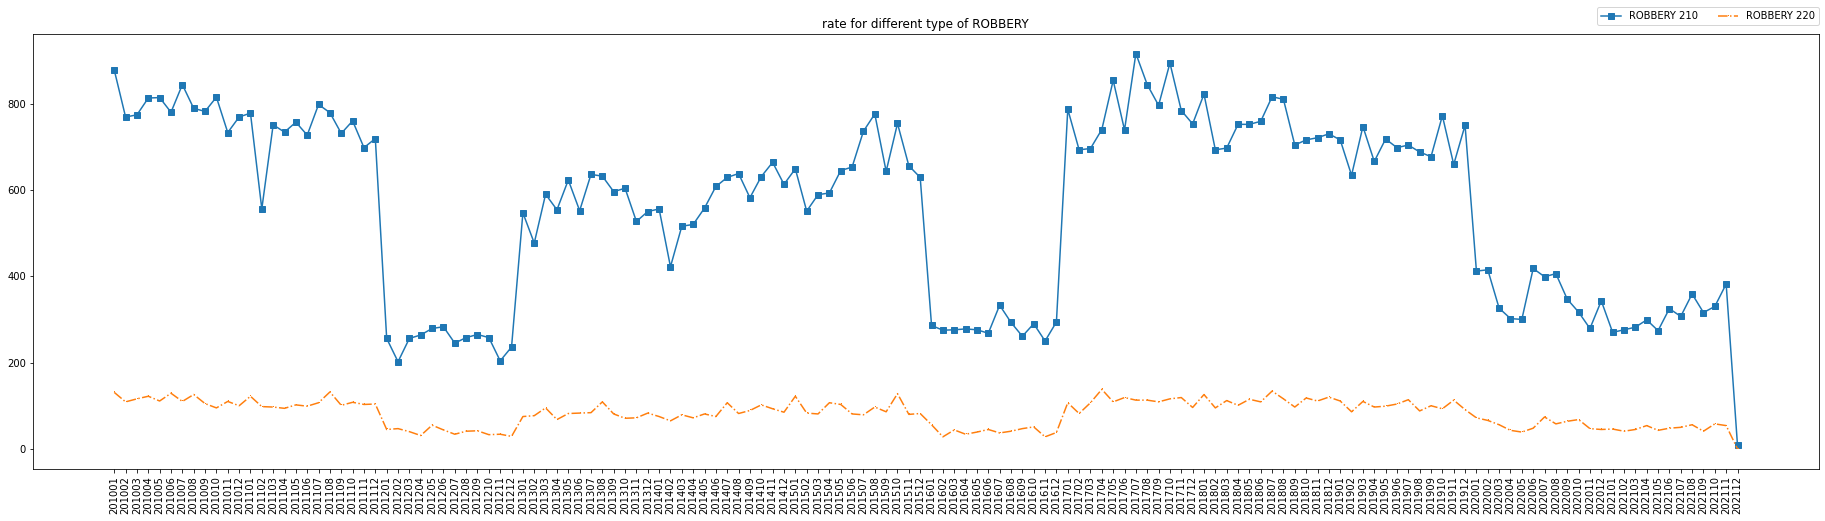

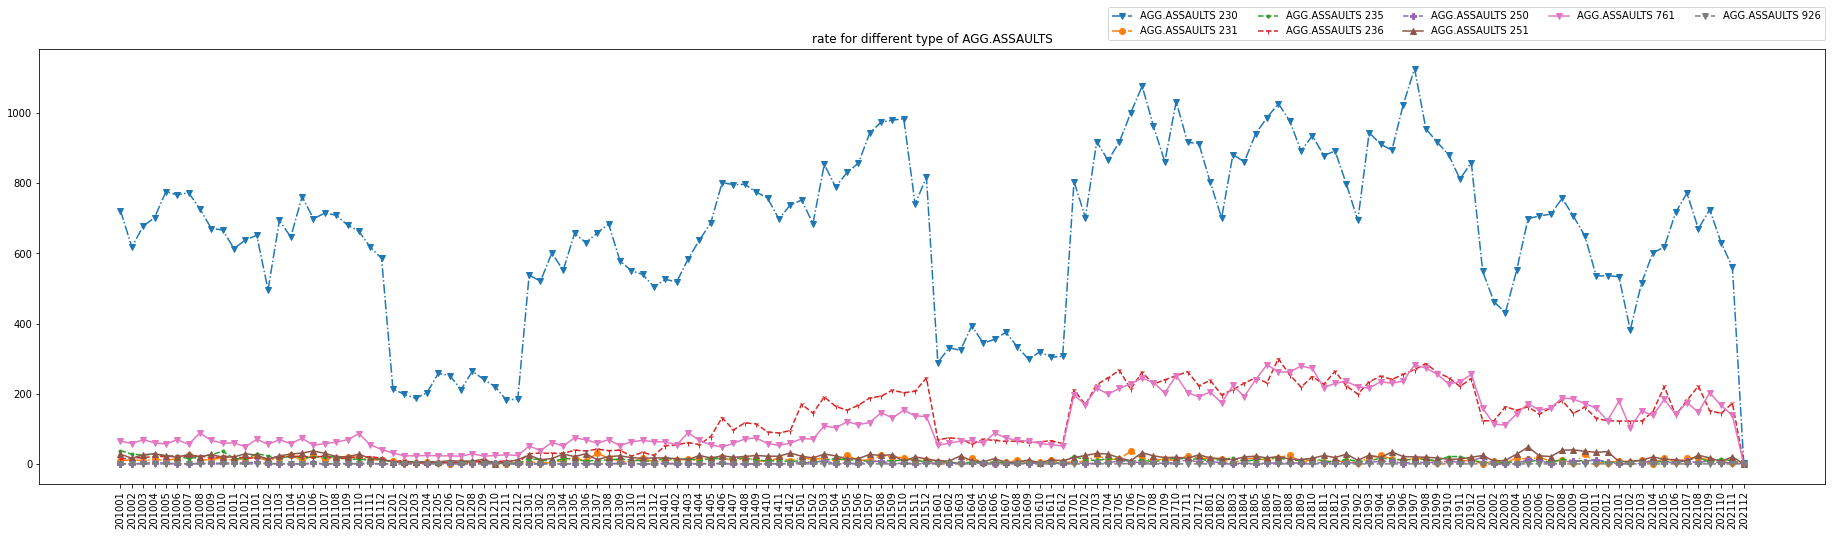

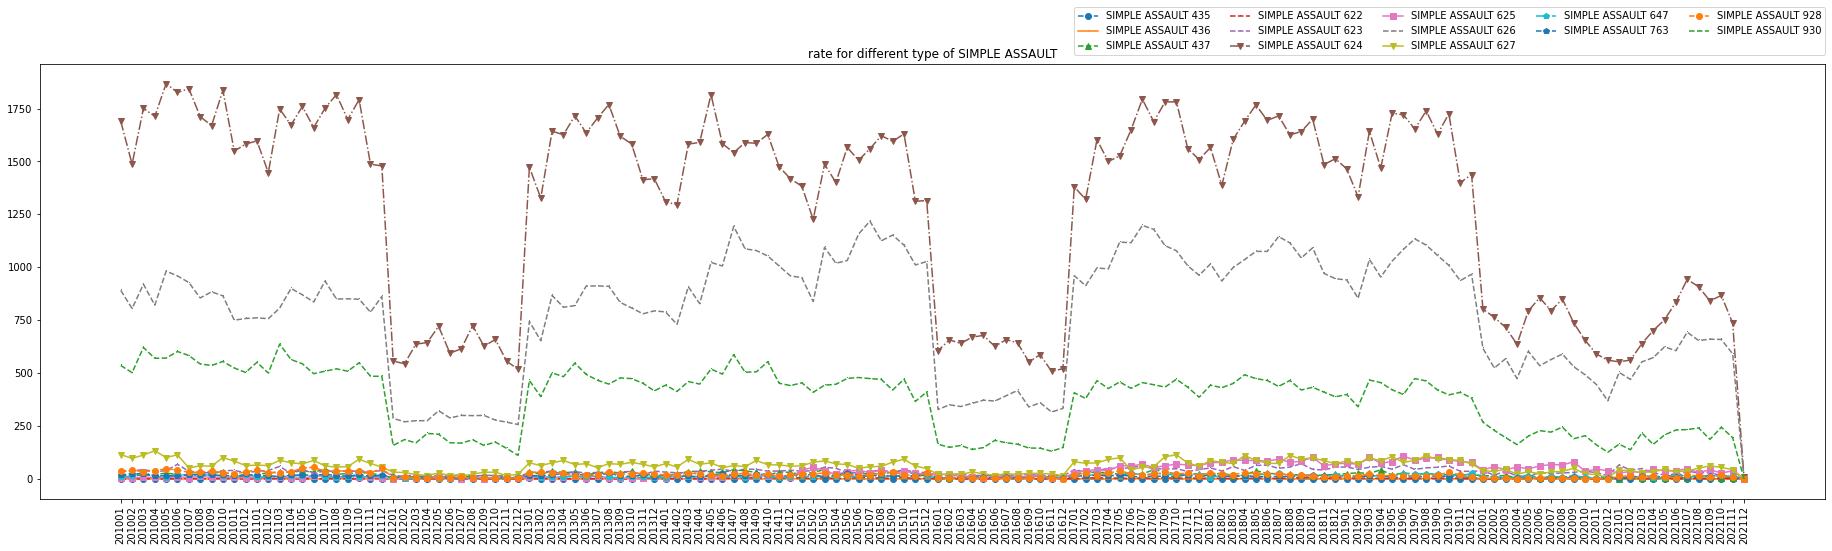

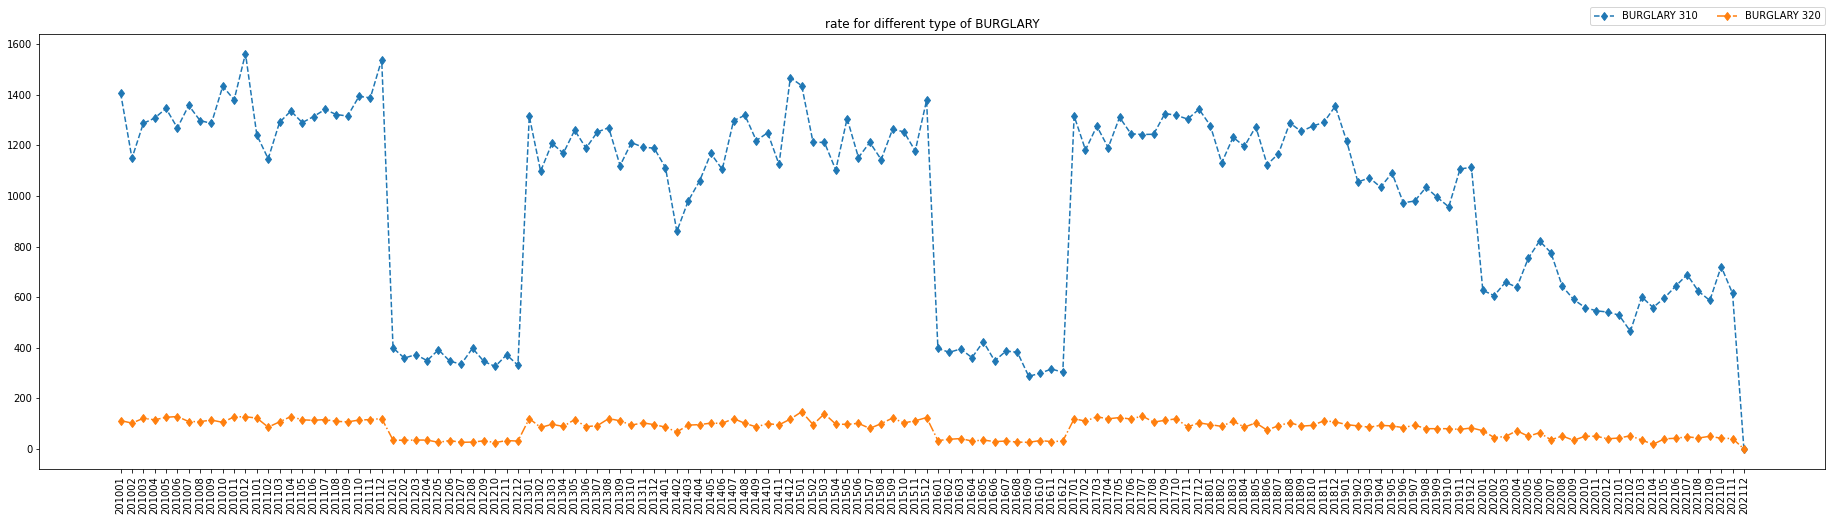

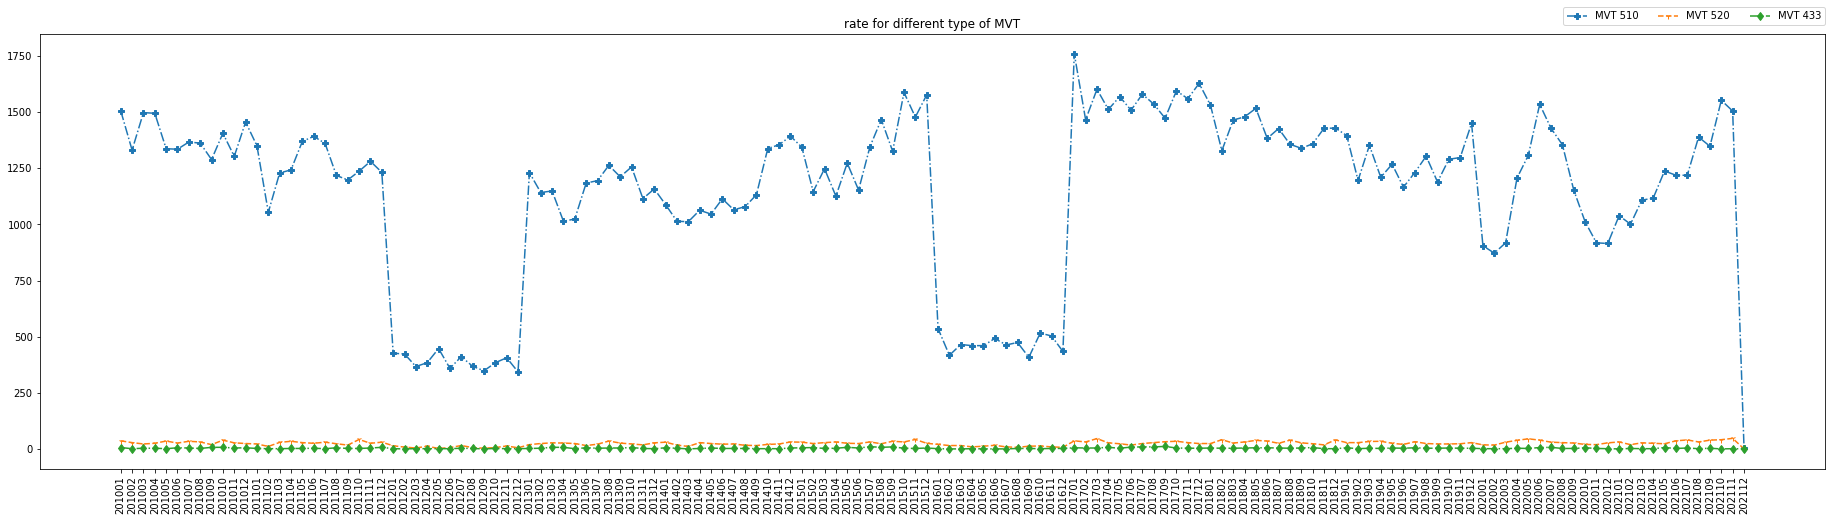

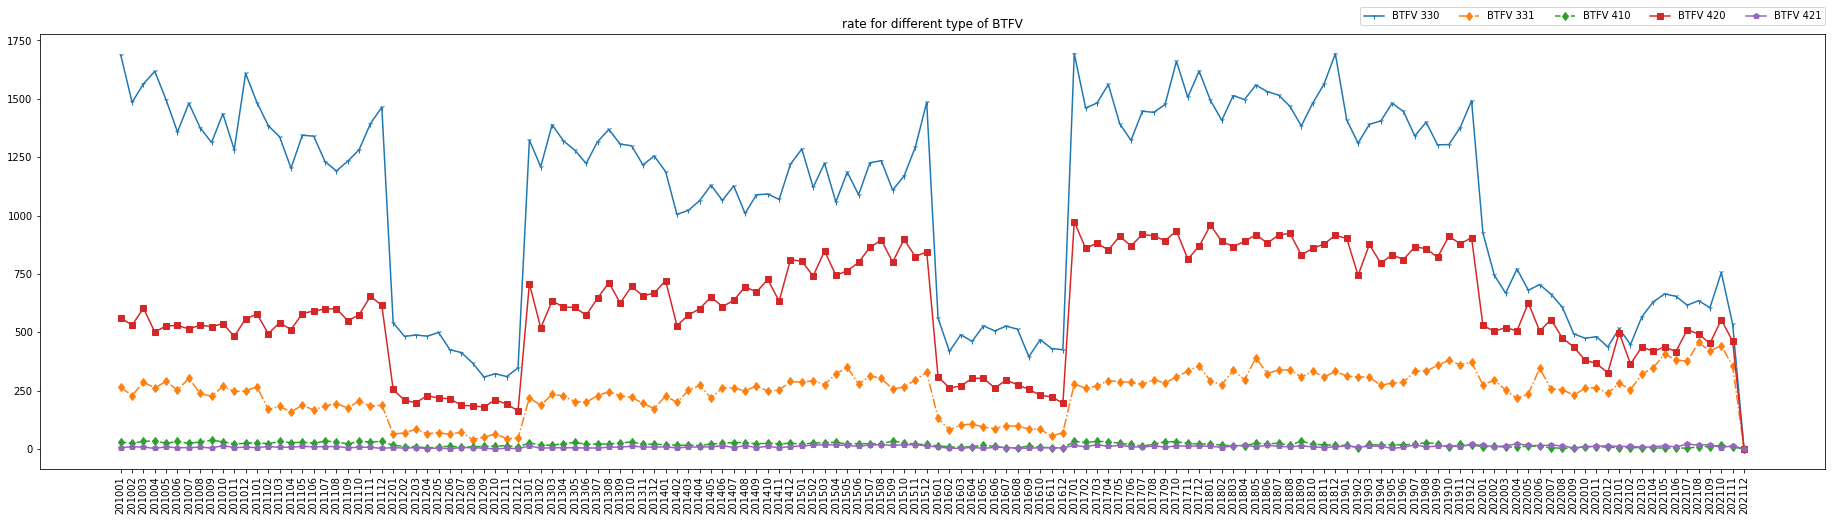

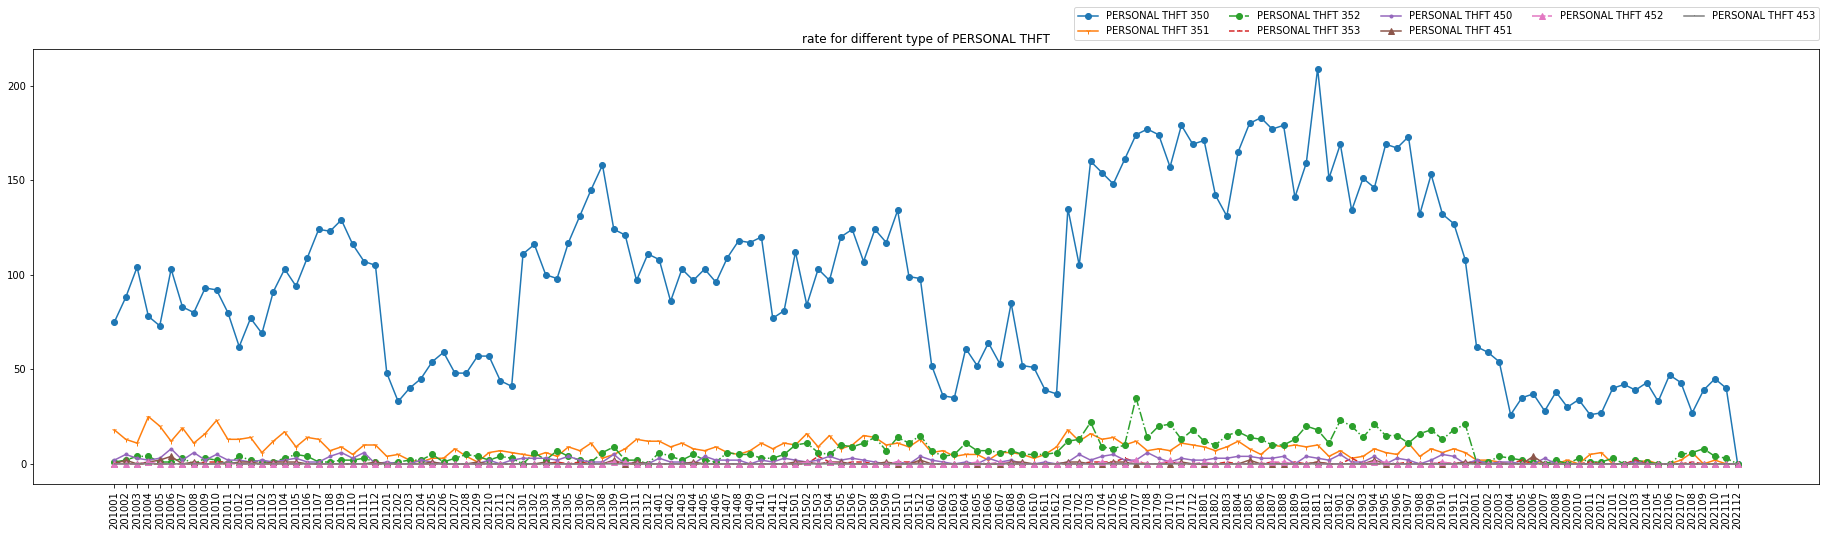

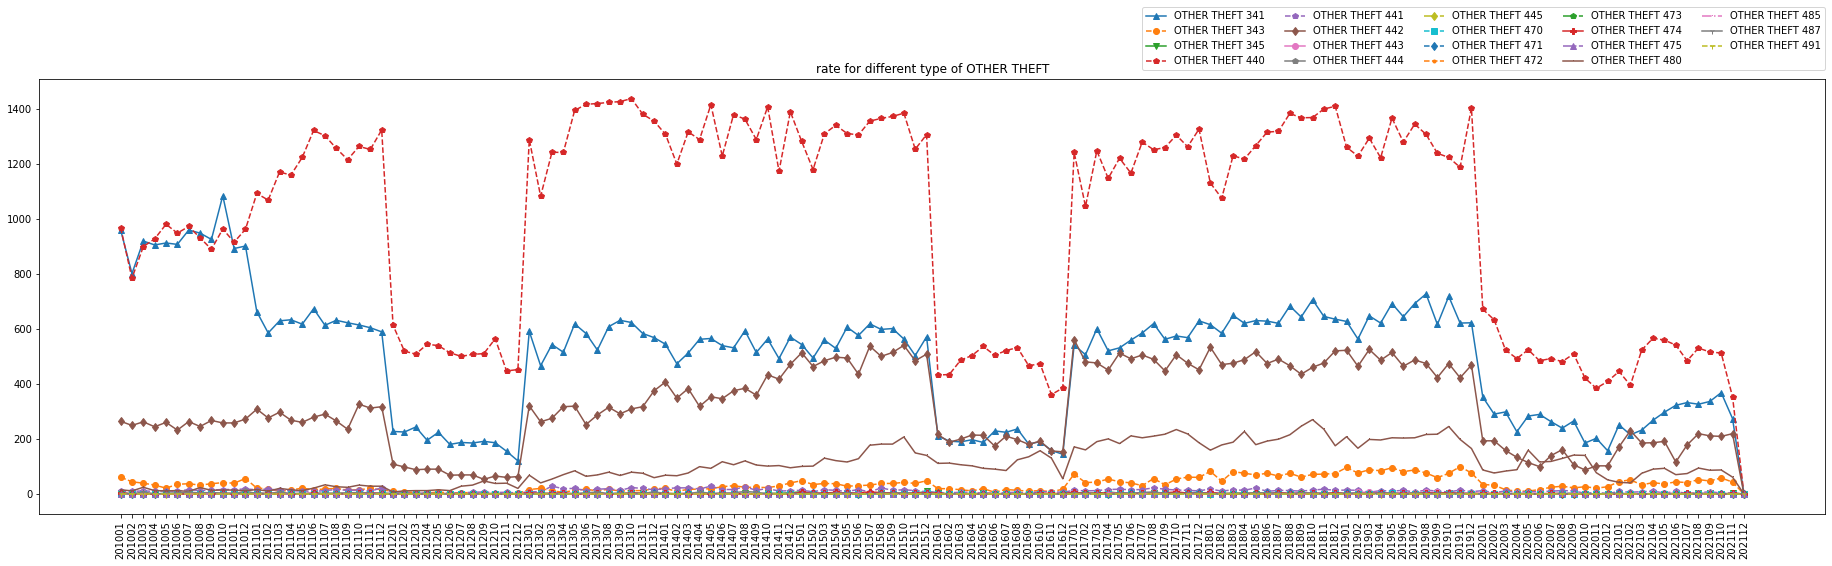

In [27]:
# Page 27
%time
ymnum=st_ed_yrmth(data)
cate=pd.CategoricalDtype(ymnum,ordered=True)
data['yrmth_cls']=data['yrmth'].astype(cate)
for key in crmcod.keys():
    select=[]
    name=[]
    for num in crmcod[key]:
        select.append(data[data['Crm Cd']==num])
        name.append(key+" "+str(num))
    crmcnt_multi(select,ymnum,name,"rate for different type of "+key)

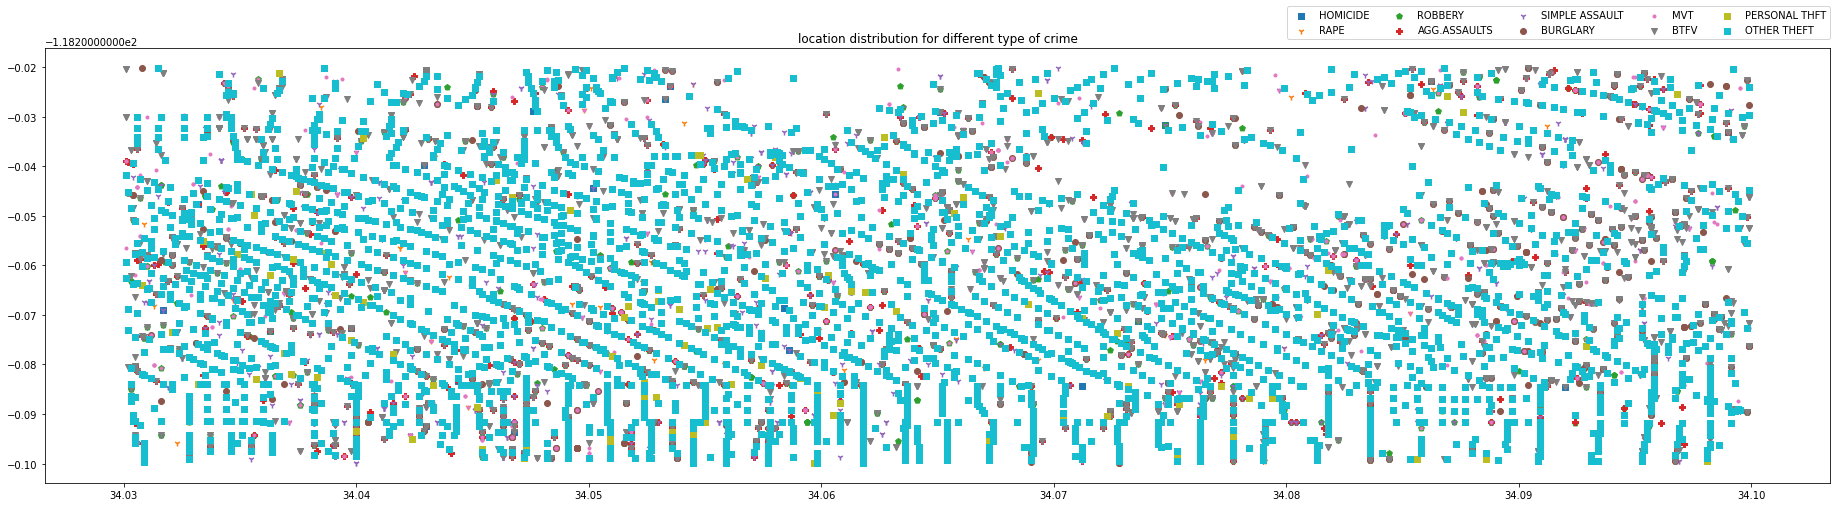

In [28]:
def crmcls_loc_multi(data,name,til=""):
    ptstl=['o','d','v','s','.',',','^','1','p','P']
    fig, ax = plt.subplots()
    for i in range(len(data)):
        single=data[i]
        ptstl_x=ptstl[random.randrange(len(ptstl))]
        ax.scatter(list(single['LAT']),list(single['LON']),marker=ptstl_x,label=name[i])
    ax.legend(bbox_to_anchor=(0., 1.02 , 1., .102), loc='lower right',
                      ncol=5, borderaxespad=0.)
    plt.title(til)
    plt.show()
    
select=[]
name=[]
reliable=data[(data['LAT']>34.03) & (data['LAT']<34.1) & (data['LON']>-118.3) & (data['LON']<-118.22)]
for key in crmcod.keys():
    select.append(reliable[reliable['Crm Cd'].isin(crmcod[key])])
    name.append(key)
crmcls_loc_multi(select,name,"location distribution for different type of crime")

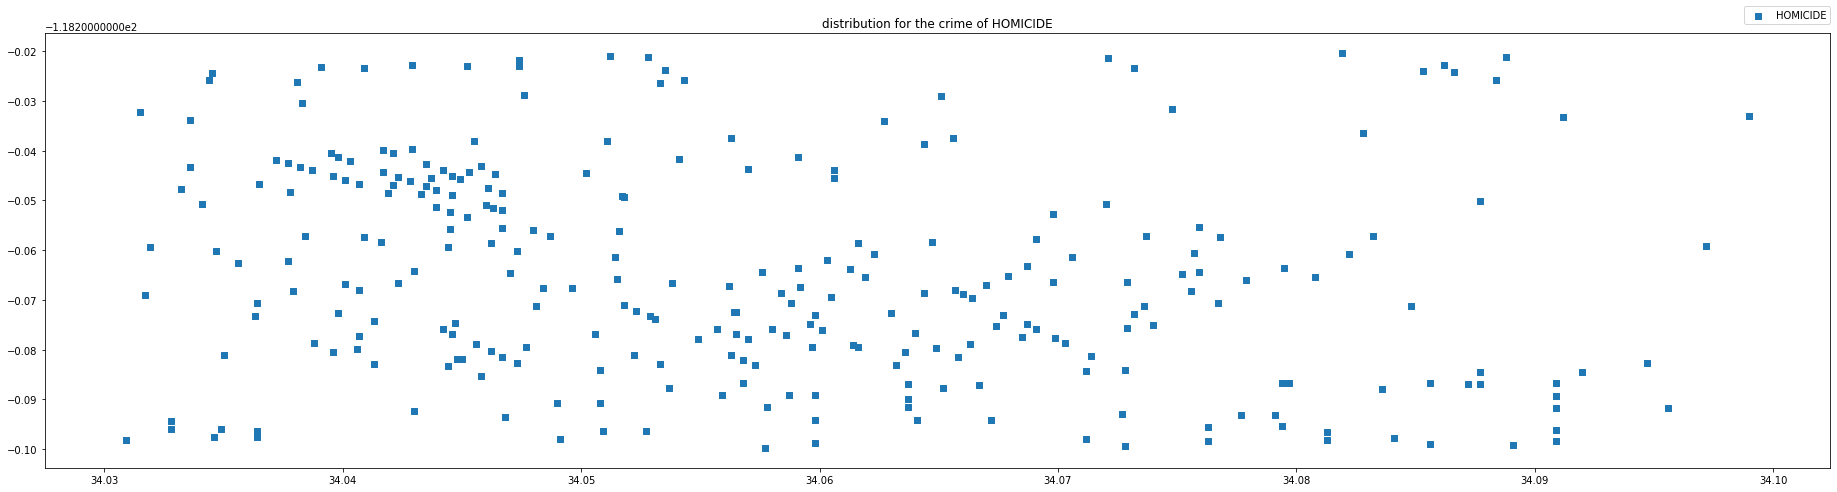

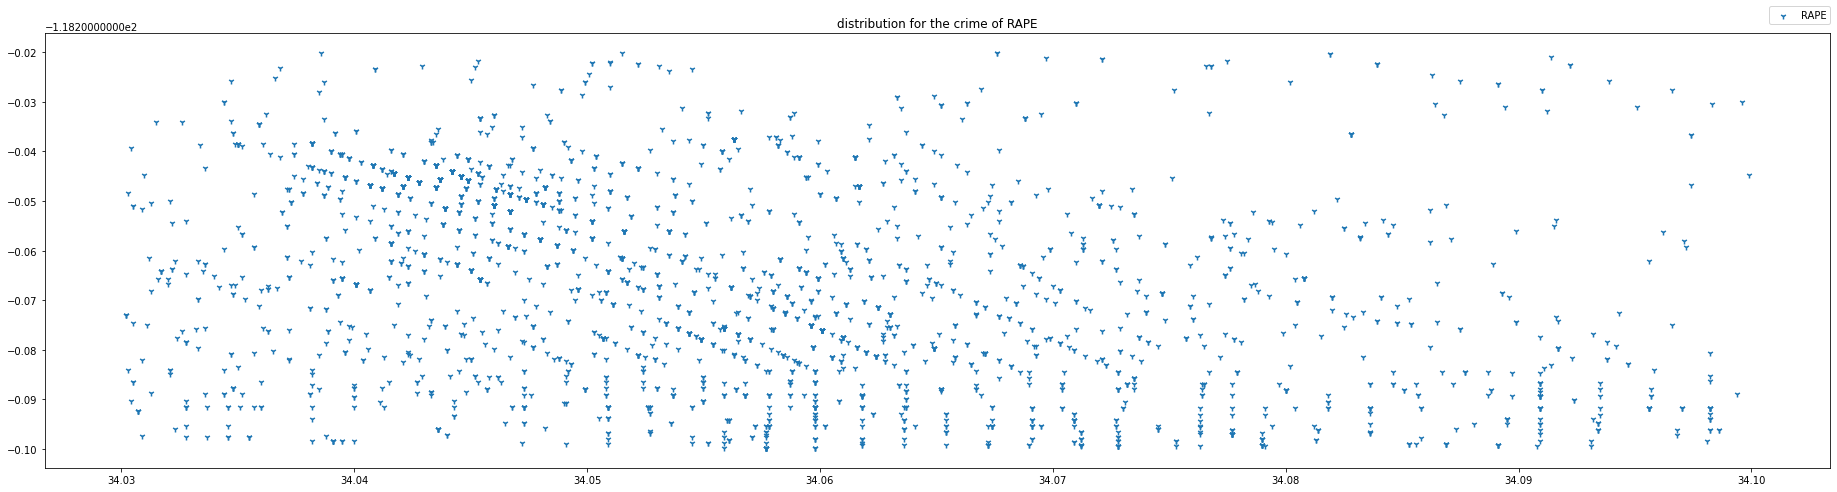

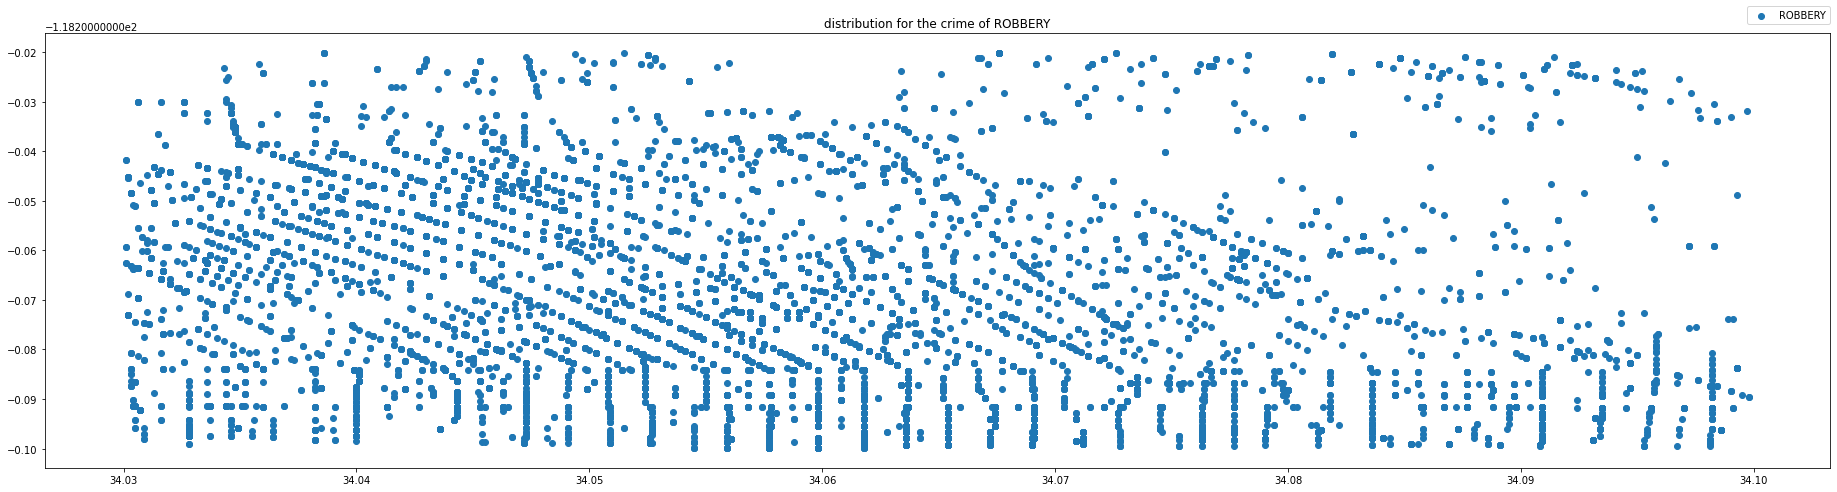

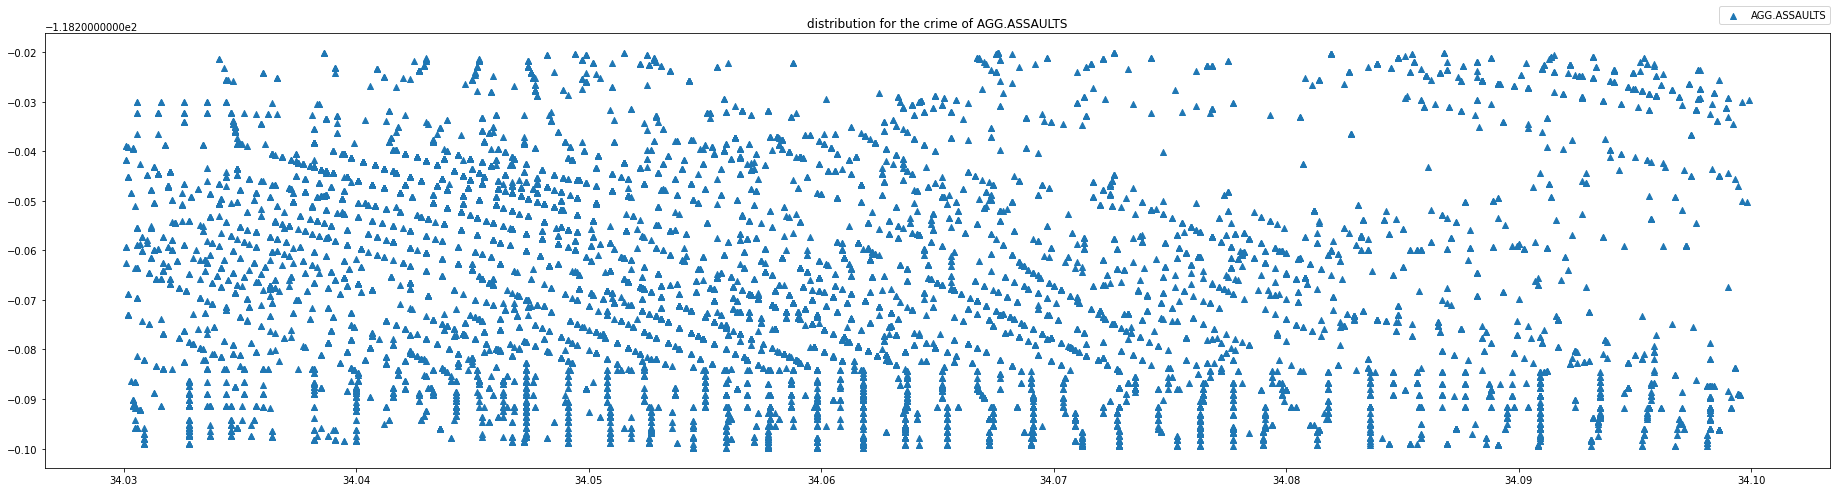

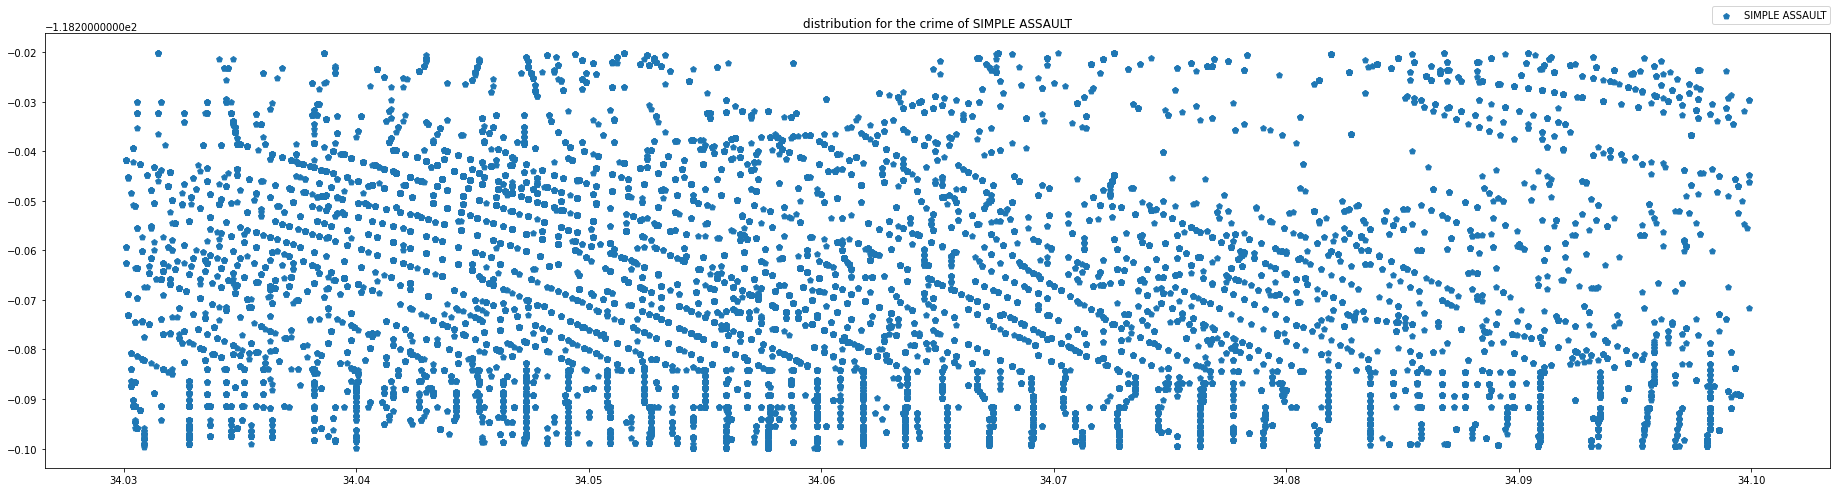

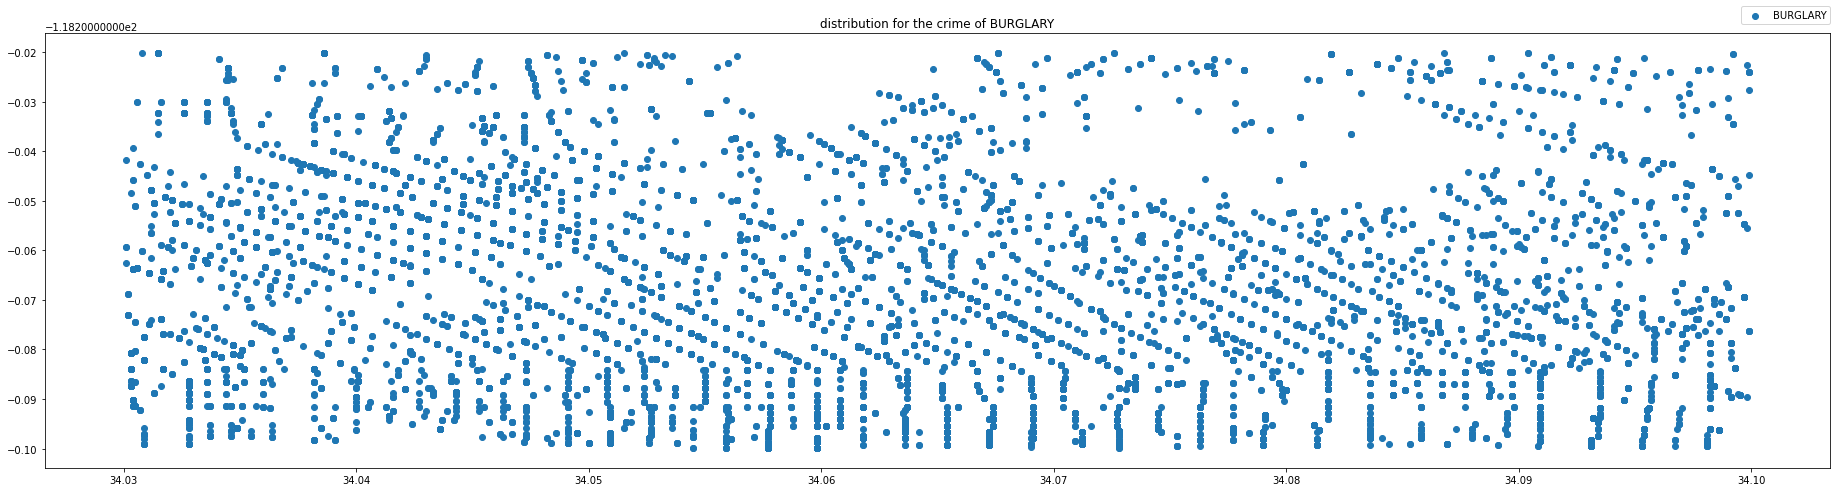

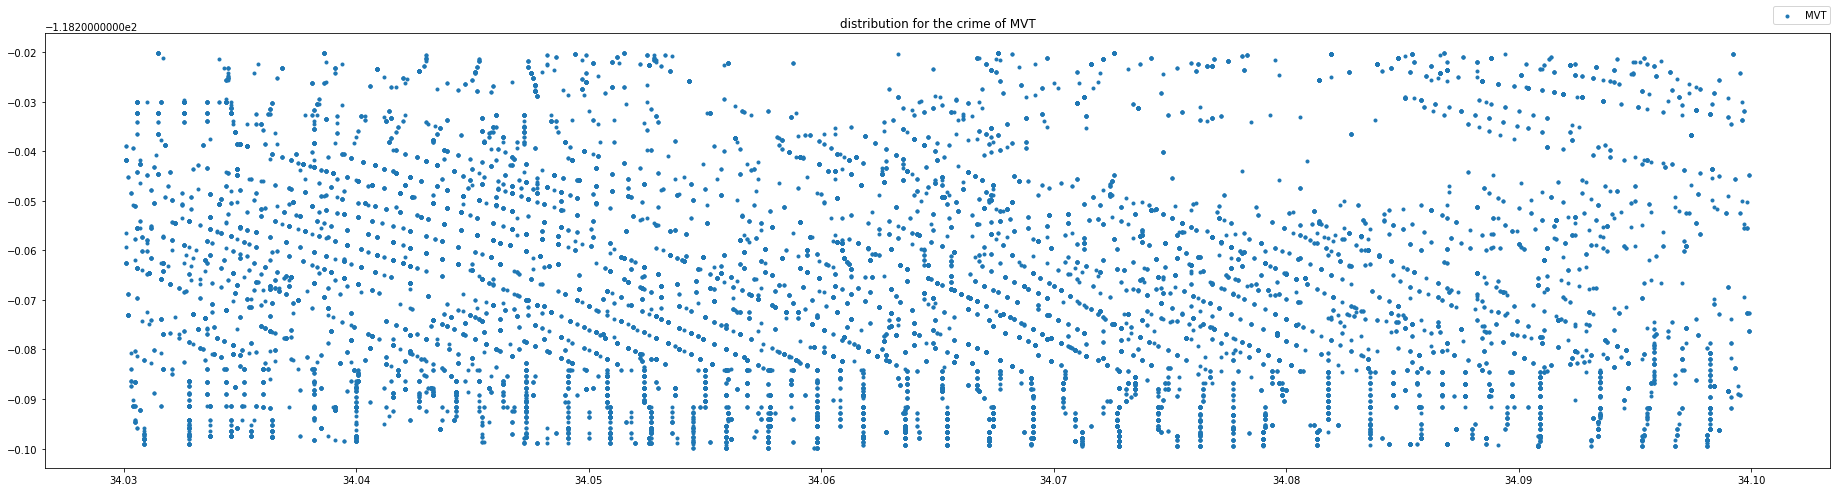

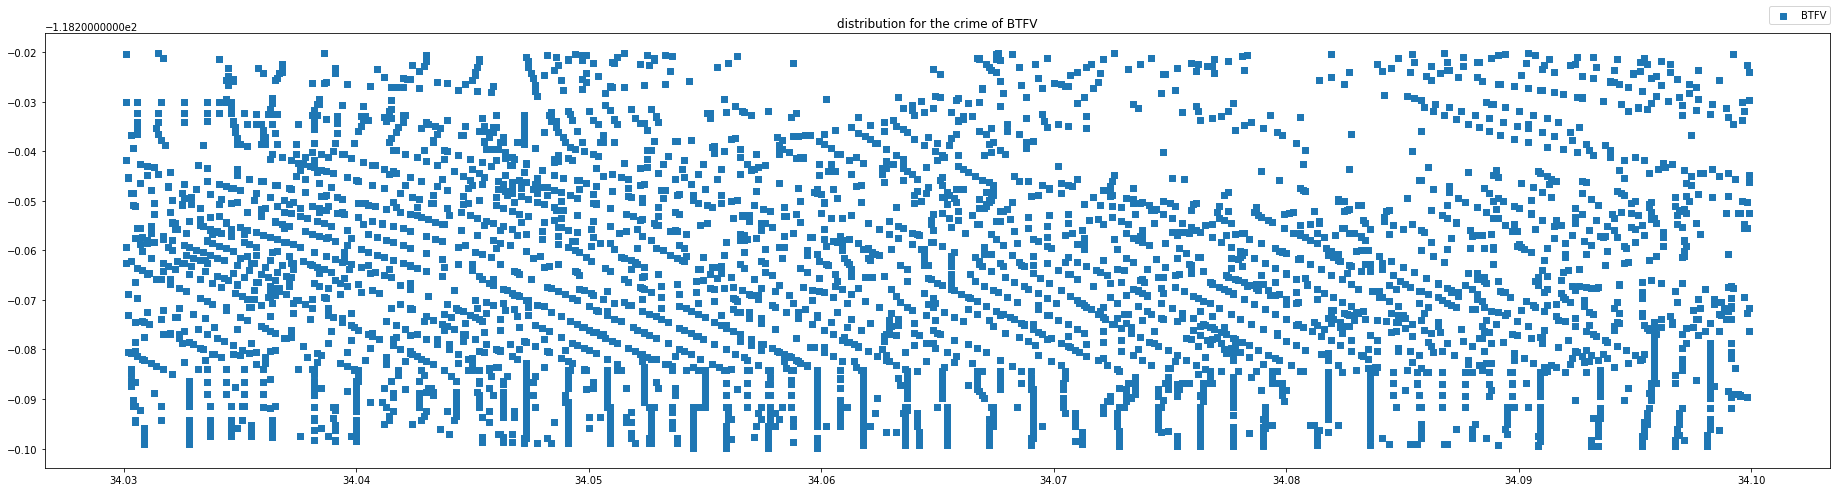

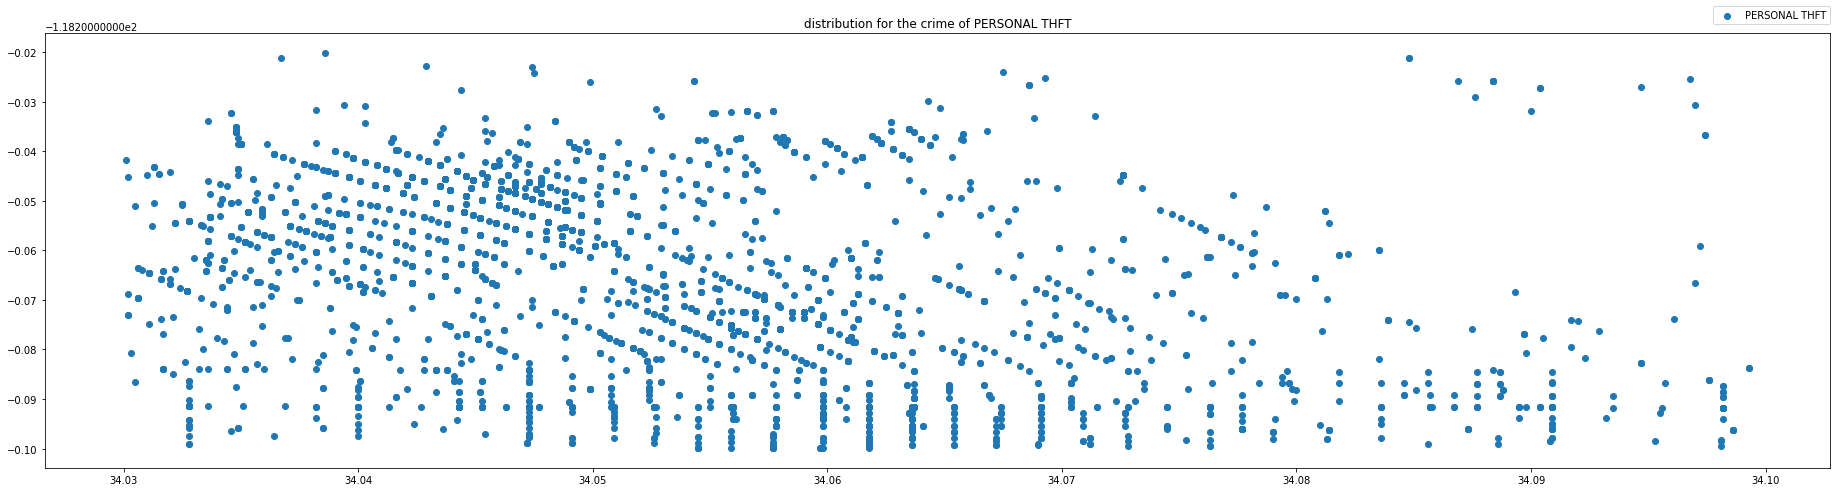

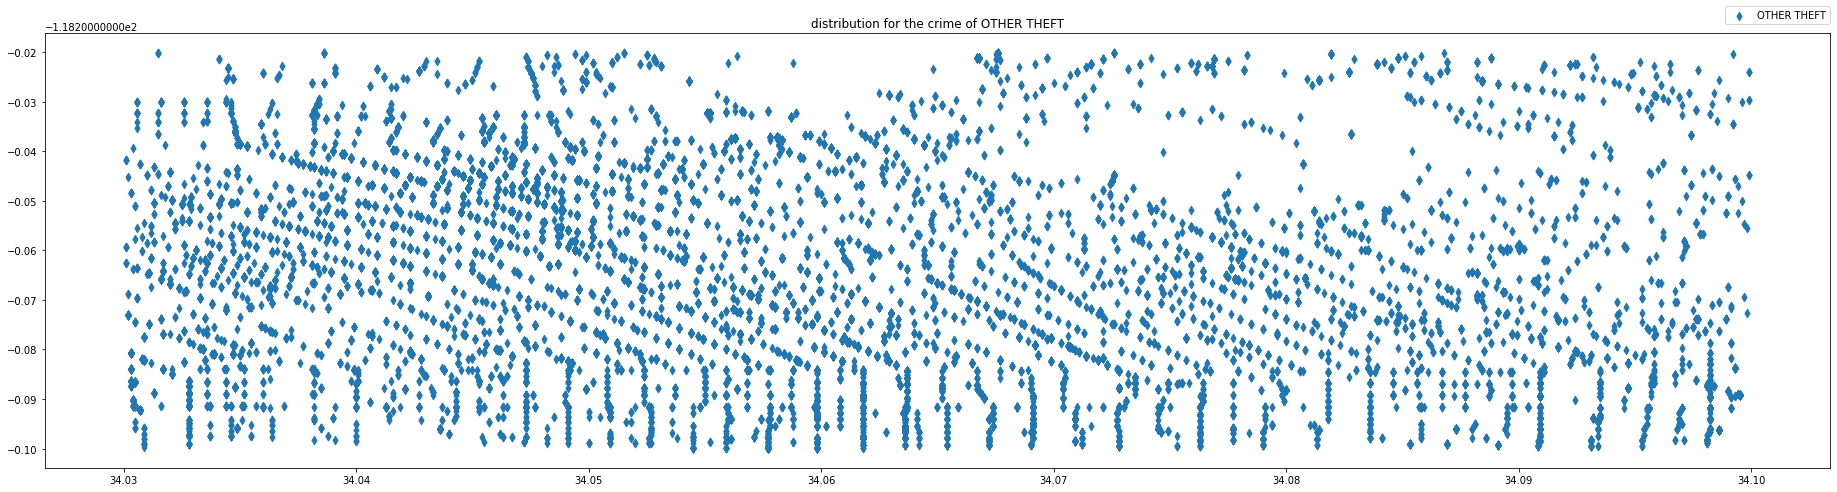

In [29]:
# Page 4-5
reliable=data[(data['LAT']>34.03) & (data['LAT']<34.1) & (data['LON']>-118.3) & (data['LON']<-118.22)]
for key in crmcod.keys():
    select=[]
    name=[]
    select.append(reliable[reliable['Crm Cd'].isin(crmcod[key])])
    name.append(key)
    crmcls_loc_multi(select,name,"distribution for the crime of "+key)

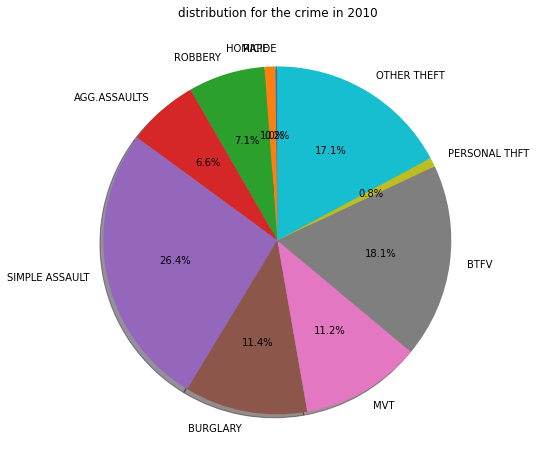

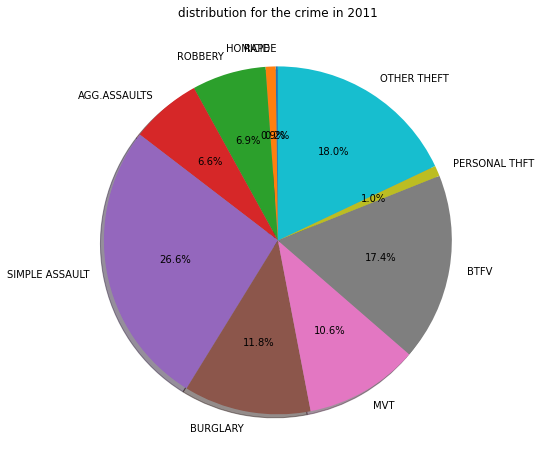

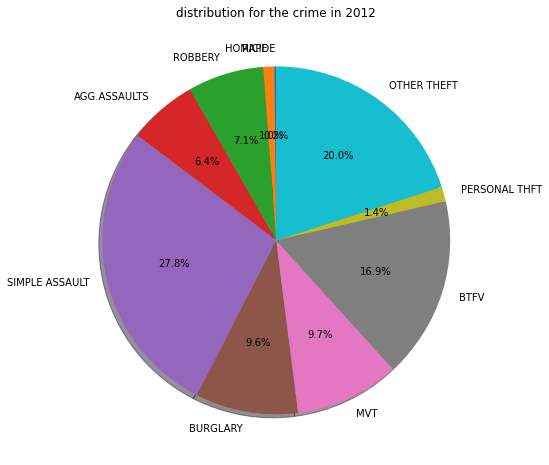

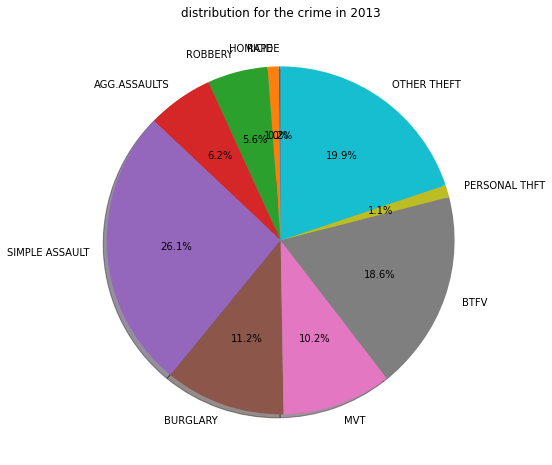

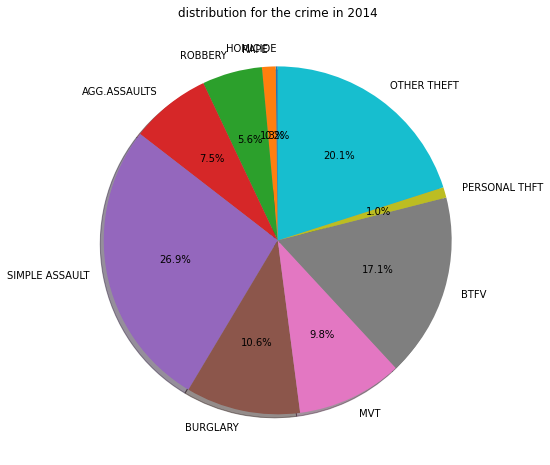

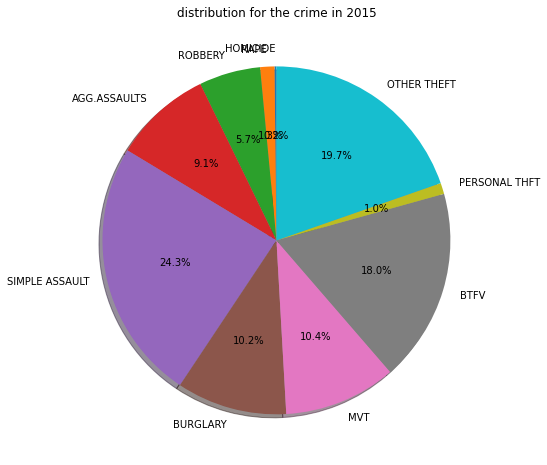

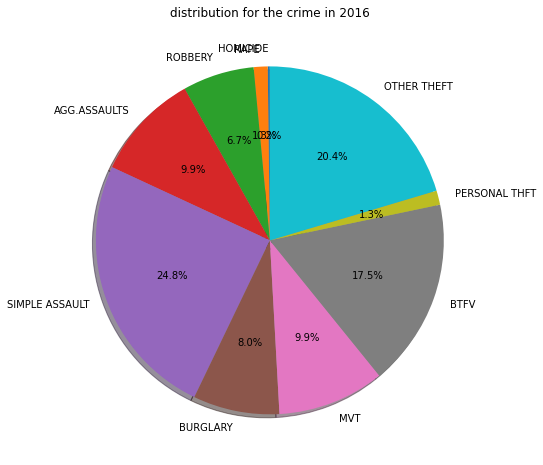

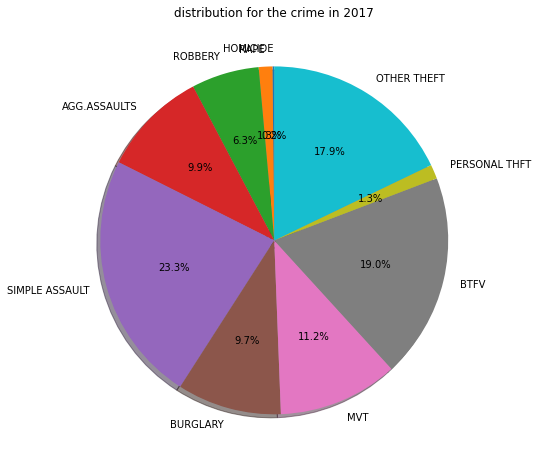

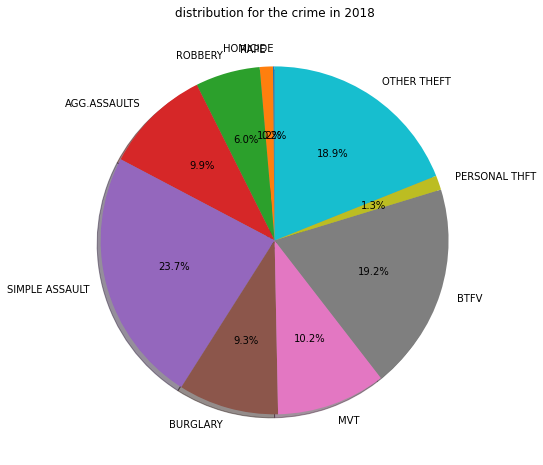

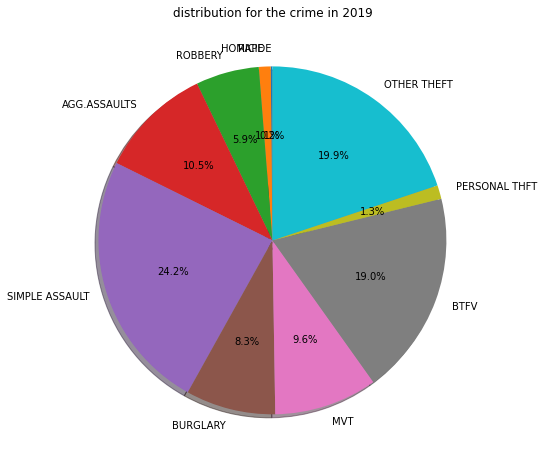

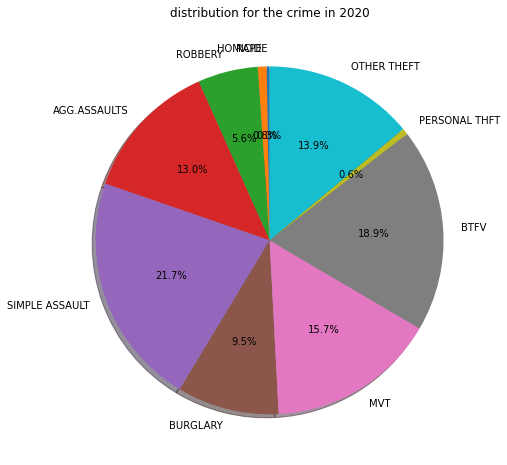

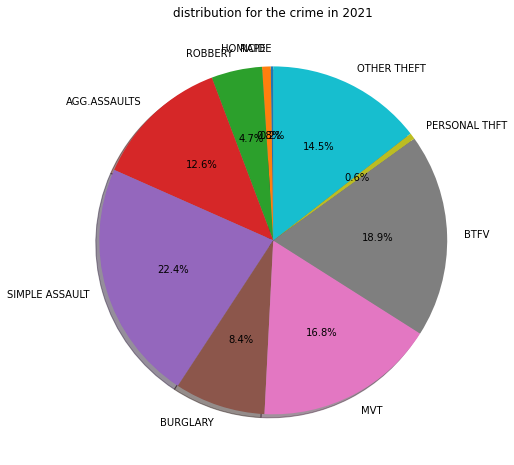

In [30]:
# Page 9
def crmcls_pie(sizes,name,til=""):
    fig, ax = plt.subplots()
    explode =tuple([0 for i in range(len(sizes))]) # (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    ax.pie(sizes, explode=explode, labels=name, autopct='%1.1f%%',
        shadow=True, startangle=90)
    # ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(til)
    plt.show()
"""
ymnum=st_ed_yrmth(data)
cate=pd.CategoricalDtype(ymstr,ordered=True)
data['yrmth_cls']=data['yrmth'].astype(cate)
"""
years=list(range(ymnum[0]//100,ymnum[-1]//100+1))
# for yr in ymnum:
for yr in years:
    thisyear=data[(yr*100 < data['yrmth']) & (data['yrmth'] < (yr+1)*100)]
    # thisyear=data[data['yrmth_cls']==yr]
    select=[]
    name=[]
    for key in crmcod.keys():
        select.append(len(thisyear[thisyear['Crm Cd'].isin(crmcod[key])]))
        name.append(key)
    crmcls_pie(select,name,"distribution for the crime in "+str(yr))

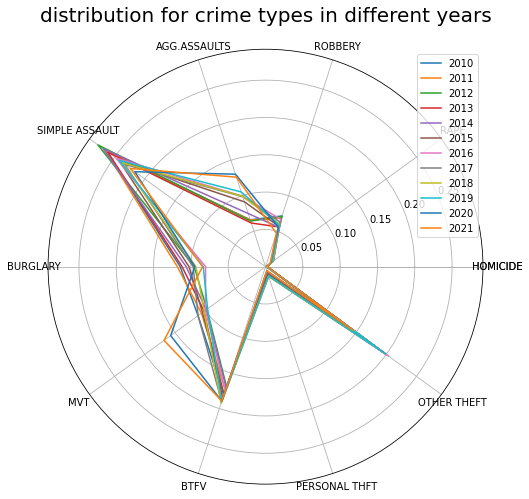

In [31]:
def radar(data,cls_name,name,til=""):
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=(len(data[0])+1))
    cat_name=[*cls_name,cls_name[0]]
    
    plt.figure(figsize=(8, 8))
    plt.subplot(polar=True)
    for i in range(len(data)):
        data_yr=data[i]
        data_yr=[*data_yr,data_yr[0]]
        plt.plot(label_loc, data_yr, label=name[i])
        
    plt.title(til, size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=cat_name)
    plt.legend()
    plt.show()

years=list(range(ymnum[0]//100,ymnum[-1]//100+1))
# for yr in ymnum:
select=[]
name=[]
cls_name=list(crmcod.keys())
for yr in years:
    name.append(str(yr))
    thisyear=data[(yr*100 < data['yrmth']) & (data['yrmth'] < (yr+1)*100)]
    # thisyear=data[data['yrmth_cls']==yr]
    select_yr=[]
    for key in crmcod.keys():
        select_yr.append(len(thisyear[thisyear['Crm Cd'].isin(crmcod[key])]))
    select_yr=np.array(select_yr)/sum(select_yr)
    select.append(select_yr)
radar(select,cls_name,name,"distribution for crime types in different years")

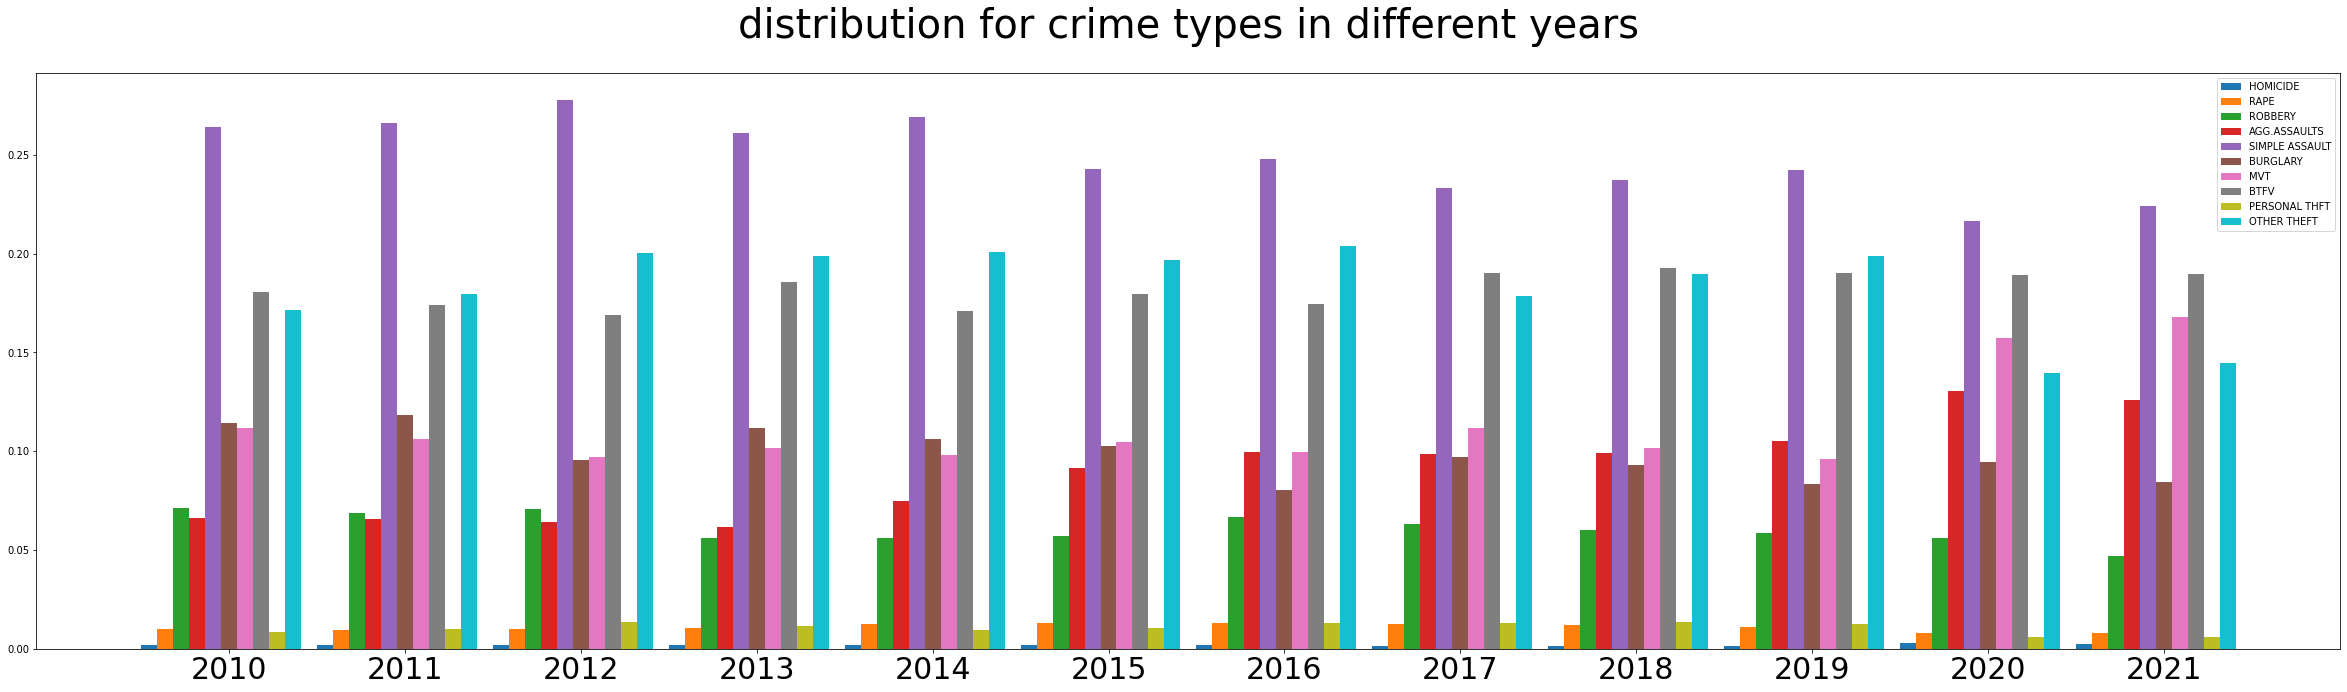

In [32]:
def bar_chart(data,cls_name,name,til=''):
    """
    data-- cls*each year
    """
    X = np.arange(len(data[0])) # how many years
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1]) #color = 'b', , color = 'g', color = 'r'
    wid=1/(len(data)+1) # or /1.2 # how many data to separate
    for i in range(len(data)):
        ax.bar(X + wid*i, data[i], width = wid, label=cls_name[i]) 
        # X -- a series of x position for the bar; + wid*i to separate different cls
        # width= how wide is this bar ?
    plt.xticks(X+wid*len(data)/2, name,size=30)
    plt.legend()
    plt.title(til, size=40, y=1.05)
bar_chart(np.array(select).T,cls_name,name,"distribution for crime types in different years")
# radar(select,cls_name,name,"distribution for the crime in "+str(yr))

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 32, 8
import matplotlib.pyplot as plt
ymstr=[]
for i in range(len(ym)):
    ymstr.append(str(ym[i]))
# plt.plot(ymstr,cd)#,scalex=True) # list(range(len(cd)))
x=list(range(len(cd)))
plt.plot(x,cd)#,scalex=True) # 
plt.xticks(x, ymstr, rotation ='vertical')
# plt.ylabel('some numbers')
plt.show()

In [ ]:
r=[0.0, 0.0, 0.10308867698080958, 0.0,
   0.06328931721583797,
   0.06832268735016316, 0.0803130047744335]

draw_case(pvertices,clist,r)